<a href="https://colab.research.google.com/github/marcinwolter/DeepLearning_2020/blob/main/hyperopt_optuna_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Hyperopt demo - minimize x^2 function

from hyperopt import fmin, tpe, rand, hp, STATUS_OK, Trials
import matplotlib.pyplot as plt

fspace = {
    'x': hp.uniform('x', -5, 5)
}

def f(params):
    x = params['x']
    val = x**2
    return {'loss': val, 'status': STATUS_OK}
    
trials = Trials()

# possible algos: algo= (tpe.suggest, rand.suggest)
best = fmin(fn=f, space=fspace, algo=rand.suggest,  max_evals=1000, trials=trials)
print('best:', best)
print(' trials:')

for trial in trials.trials[:2]:
    print(trial)




100%|██████████| 1000/1000 [00:01<00:00, 895.53it/s, best loss: 1.485477864799157e-05]
best: {'x': -0.0038541897524630997}
 trials:
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 19.94510181882191, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [0]}, 'vals': {'x': [4.465993934033264]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 11, 30, 22, 8, 27, 738000), 'refresh_time': datetime.datetime(2020, 11, 30, 22, 8, 27, 738000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 19.276627055901574, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [1]}, 'vals': {'x': [-4.390515579735662]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 11, 30, 22, 8, 27, 740000), 'refresh_time': datetime.datetime(2020, 11, 30, 22, 8, 27, 740000)}


In [10]:
print(trials.trials)

[{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 19.94510181882191, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [0]}, 'vals': {'x': [4.465993934033264]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 11, 30, 22, 8, 27, 738000), 'refresh_time': datetime.datetime(2020, 11, 30, 22, 8, 27, 738000)}, {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 19.276627055901574, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [1]}, 'vals': {'x': [-4.390515579735662]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 11, 30, 22, 8, 27, 740000), 'refresh_time': datetime.datetime(2020, 11, 30, 22, 8, 27, 740000)}, {'state': 2, 'tid': 2, 'spec': None, 'result': {'loss': 22.190437117832317, 'status': 'ok'}, 'misc': {'tid': 2, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir

Text(0, 0.5, '$x$')

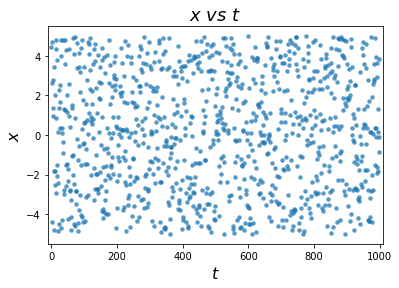

In [11]:
f, ax = plt.subplots(1)

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['x'] for t in trials.trials]

ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)

Text(0, 0.5, '$val$')

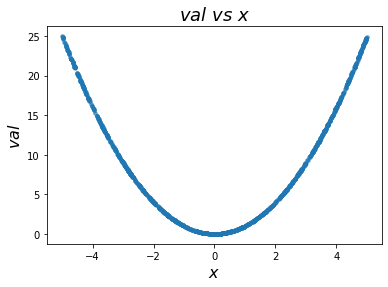

In [12]:
f, ax = plt.subplots(1)

xs = [t['misc']['vals']['x'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]

ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $x$ ', fontsize=18)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)

# **Optuna demo**

In [13]:
# install optuna
! pip install optuna

In [14]:


import optuna

def objective(trial):
    x = trial.suggest_uniform('x', -10, 10)
    y = trial.suggest_uniform('y', -10, 10)


    # Handle pruning based on the intermediate value.
    if trial.should_prune():
            raise optuna.TrialPruned()  

    return (x - 2) ** 2 + (y-1) ** 2

study = optuna.create_study()
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner(), sampler=optuna.samplers.TPESampler() )

study.optimize(objective, n_trials=100)

study.best_params  # E.g. {'x': 1.7867602526129278, 'y': 1.0872101494664252}

[I 2020-11-30 22:08:31,910] A new study created in memory with name: no-name-d78fc116-2832-48d2-9fe3-920bd860f0b0
[I 2020-11-30 22:08:31,914] A new study created in memory with name: no-name-d735521f-fb66-4416-8cb3-3c77cb1b0980
[I 2020-11-30 22:08:31,916] Trial 0 finished with value: 70.81443648254684 and parameters: {'x': 1.723268116650388, 'y': -7.410580000647078}. Best is trial 0 with value: 70.81443648254684.
[I 2020-11-30 22:08:31,917] Trial 1 finished with value: 10.958295614067573 and parameters: {'x': 4.483841926194058, 'y': -1.1883383878523368}. Best is trial 1 with value: 10.958295614067573.
[I 2020-11-30 22:08:31,919] Trial 2 finished with value: 25.277010776952856 and parameters: {'x': 1.0257986962541636, 'y': 5.9323364237177465}. Best is trial 1 with value: 10.958295614067573.
[I 2020-11-30 22:08:31,920] Trial 3 finished with value: 24.138853179007626 and parameters: {'x': 2.457734707601084, 'y': 5.891761657773708}. Best is trial 1 with value: 10.958295614067573.
[I 2020-1

{'x': 2.1502611646614236, 'y': 0.6578762198865076}

## Visualizing the Optimization History

In [15]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

## Visualizing High-dimensional Parameter Relationships

In [16]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study, params=['x', 'y'])

## Visualizing Parameter Relationships

In [17]:
from optuna.visualization import plot_contour

plot_contour(study)

### Selecting Parameters to Visualize

In [18]:
plot_contour(study, params=['x', 'y'])

## Visualizing Individual Parameters

In [19]:
from optuna.visualization import plot_slice

plot_slice(study)

### Selecting Parameters to Visualize

In [20]:
plot_slice(study, params=['x', 'y'])

## Visualizing Parameter Importances

In [21]:
from optuna.visualization import plot_param_importances

plot_param_importances(study)